In [67]:
import pandas as pd
import numpy as np
import json
from emoji import core
import re
import ast
import matplotlib.pyplot as plt

In [2]:
path = './res/'

In [3]:
train = pd.read_json(path + 'train.json', typ = 'frame')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115071 entries, 0 to 115070
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          115071 non-null  object
 1   id            115071 non-null  int64 
 2   plylst_title  115071 non-null  object
 3   songs         115071 non-null  object
 4   like_cnt      115071 non-null  int64 
 5   updt_date     115071 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.3+ MB


### 1. train 파일 내 공란 태그 삭제

In [4]:
# 공란 태그가 있는 행 확인

train[train['tags'].apply(lambda x:  any(tag == '' for tag in x))]

,tags,id,plylst_title,songs,like_cnt,updt_date
56921,"[힙합, , 흑인음악, 힙합엘이, 힙합추천, 틱톡, 외힙, HIPHOPLE]",95032,어떻게 떴냐고? 답은 바로 TikTok!,"[253222, 270262, 301533, 136007, 238347, 13384...",7,2020-01-08 11:19:11.000


In [5]:
# 삭제
train['tags'] = train['tags'].apply(lambda tags: [tag.strip() for tag in tags if tag.strip() != ''])

In [6]:
# 공란 태그가 제거되었는지 확인
train[train['plylst_title']=='어떻게 떴냐고? 답은 바로 TikTok!']

,tags,id,plylst_title,songs,like_cnt,updt_date
56921,"[힙합, 흑인음악, 힙합엘이, 힙합추천, 틱톡, 외힙, HIPHOPLE]",95032,어떻게 떴냐고? 답은 바로 TikTok!,"[253222, 270262, 301533, 136007, 238347, 13384...",7,2020-01-08 11:19:11.000


### 2. train 파일 내 플레이리스트 이모지&특수문자&양옆공백&양옆%,& 제거

In [7]:
# 이모지 제거 함수
def replace_emoji(inputString):
    return core.replace_emoji(inputString, replace='')

# 특수문자 제거 함수
def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^●○.@*\"※~ㆍ!<>$♥❤♡☆★♪♬♩¶♨①๑｡＊②ఇ¥◈ ͡✔ ͡° ͜ʖ▶◀◎ღ✿ﾉ■『│』ᕷⓗ‘|\(\)\[\]`\'…》\”\“\’·]',' ', inputString)
  return text_rmv

In [8]:
# # 이모지 제거 함수 적용
train['plylst_title'] = train['plylst_title'].apply(replace_emoji)

# 특수문자 제거 함수 적용
train['plylst_title'] = train['plylst_title'].apply(clean_text)

In [9]:
# 확인

print(train['plylst_title'][2609]) # 이모지
print(train['plylst_title'][2636]) # 특수문자
print(train['plylst_title'][2647]) # 특수문자

내리는 빗속의 Pop Music
2015 서재페 준비하자  
사랑이          


In [10]:
# 양 옆 공백, %, & 제거

train['plylst_title'] = train['plylst_title'].str.strip()
train['plylst_title'] = train['plylst_title'].str.strip('%')
train['plylst_title'] = train['plylst_title'].str.strip('&')

In [11]:
# 저장

train.to_json('./origin_data_modify/train_mod1.json')

In [12]:
# 불러와 잘 반영되었는지 확인

train = pd.read_json('./origin_data_modify/train_mod1.json', typ = 'frame')
train.iloc[[56921, 2609, 2636, 2647], :]

,tags,id,plylst_title,songs,like_cnt,updt_date
56921,"[힙합, 흑인음악, 힙합엘이, 힙합추천, 틱톡, 외힙, HIPHOPLE]",95032,어떻게 떴냐고 답은 바로 TikTok,"[253222, 270262, 301533, 136007, 238347, 13384...",7,2020-01-08 11:19:11.000
2609,"[비오는날, 까페]",40321,내리는 빗속의 Pop Music,"[28832, 243951, 177460, 660937, 476680, 503352...",3,2014-07-24 11:23:19.000
2636,"[여행, 기분전환, 산책]",265,2015 서재페 준비하자,"[348950, 196398, 165299, 197626, 108268, 65788...",18,2017-09-12 23:48:23.000
2647,"[슬픔, 이별]",77888,사랑이,"[197227, 397454, 401502, 522150, 655756, 62215...",3,2007-07-08 06:18:37.000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115071 entries, 0 to 115070
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          115071 non-null  object
 1   id            115071 non-null  int64 
 2   plylst_title  115071 non-null  object
 3   songs         115071 non-null  object
 4   like_cnt      115071 non-null  int64 
 5   updt_date     115071 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.1+ MB


### 3.train 파일 내 플레이리스트 타이틀 중복되는 것 제거

- 플레이리스트 중복 타이틀 확인

In [14]:
# 1. 플레이리스트 아이디(id)와 플레이리스트 명(plylst_title) 추출
plylst_title = train[['id', 'plylst_title']]

# 2. 플레이리스트 이름 별 플레이리스트 ID count 테이블 생성 : plylst_id_cnt
plylst_id_cnt = plylst_title.groupby('plylst_title').id.nunique().reset_index(name = 'mapping_plylst_cnt')

# 3. 플레이리스트 명 중복 구분 : 서로 다른 플레이리스트 아이디로 겹치는 플레이리스트 이름이 없으면 '중복 없음', 그 외 '중복 있음'
plylst_id_cnt = plylst_id_cnt.assign(
    mapping_plylst_cnt_category = pd.cut(plylst_id_cnt['mapping_plylst_cnt'], [0, 1, np.inf], labels = ['중복 없음', '중복 있음'])
)
plylst_id_cnt
# [0, 1, np.inf] : 0이상 1미만 값 = 중복없음, 1이상의 값 = 중복있음

,plylst_title,mapping_plylst_cnt,mapping_plylst_cnt_category
0,,97,중복 있음
1,비 오는 날 어울리는 몽환적인 힐링 피아노 모음,1,중복 없음
2,비오는날 듣기 좋은 연주곡 모음,1,중복 없음
3,0 일렉듣고 광질준비 O K _ElecVVIP,1,중복 없음
4,00 Electronica__EDM,1,중복 없음
...,...,...,...
109452,＆ 잘 알려지지 않은 인디 음악가들,1,중복 없음
109453,＆밤과 새벽 사이의 음악들＆,1,중복 없음
109454,ＣＬＵＢ_Music,1,중복 없음
109455,＿Now and Here,1,중복 없음


In [15]:
# 4. 중복 구분 별 플레이리스트 수 count 테이블 생성 : plylst_id_cnt_division
plylst_id_cnt_division = pd.DataFrame(plylst_id_cnt.groupby('mapping_plylst_cnt_category').count())
plylst_id_cnt_division

,plylst_title,mapping_plylst_cnt
mapping_plylst_cnt_category,,
중복 없음,106714,106714
중복 있음,2743,2743


In [16]:
# 플리 제목이 중복인 플리들 확인

plylst_id_cnt_dup = plylst_id_cnt[plylst_id_cnt['mapping_plylst_cnt_category'] == '중복 있음']
plylst_id_cnt_dup.sort_values('mapping_plylst_cnt', ascending=False)

,plylst_title,mapping_plylst_cnt,mapping_plylst_cnt_category
0,,97,중복 있음
106606,혼자만의 시간이 필요할때,43,중복 있음
55040,비오는날,34,중복 있음
83776,자기전 하루한곡 발라드,31,중복 있음
24589,금요일,30,중복 있음
...,...,...,...
17513,감각적인 라이징 하우스 뮤직과 함께 신나는 파티를,2,중복 있음
57056,사랑을 노래하다,2,중복 있음
57019,사랑은 깊은 만큼 아픈 것 감성힙합,2,중복 있음
57016,사랑은,2,중복 있음


In [17]:
# 중복 플리의 총 갯수 확인

sum(plylst_id_cnt_dup['mapping_plylst_cnt'])

8357

In [18]:
# train에 중복 갯수, 중복 여부 컬럼 추가, 플레이리스트 내 곡 갯수 추가

train = pd.merge(train, plylst_id_cnt, on='plylst_title')
train['song_cnt'] = train['songs'].apply(lambda x : len(x))
train

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,1,중복 없음,19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,1,중복 없음,42
2,"[까페, 잔잔한]",76951,편하게 잔잔하게 들을 수 있는 곡,"[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,1,중복 없음,28
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,1,중복 없음,38
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,1,중복 없음,53
...,...,...,...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E SM 2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000,1,중복 없음,12
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000,1,중복 없음,11
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,1 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000,1,중복 없음,11
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000,1,중복 없음,55


In [19]:
# plyst_title이 빈 문자열인 플레이리스트 삭제
# 특수문자, 이모지를 지우고 나니 plylst_title이 빈 문자열인 플레이리스트가 93개 생김

train = train[train['plylst_title'] != '']
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114974 entries, 0 to 115070
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   tags                         114974 non-null  object  
 1   id                           114974 non-null  int64   
 2   plylst_title                 114974 non-null  object  
 3   songs                        114974 non-null  object  
 4   like_cnt                     114974 non-null  int64   
 5   updt_date                    114974 non-null  object  
 6   mapping_plylst_cnt           114974 non-null  int64   
 7   mapping_plylst_cnt_category  114974 non-null  category
 8   song_cnt                     114974 non-null  int64   
dtypes: category(1), int64(4), object(4)
memory usage: 8.0+ MB


In [24]:
# 매핑갯수, 타이틀, 플리 내 노래 갯수 내림차순 정렬
train = train.sort_values(['mapping_plylst_cnt', 'plylst_title', 'song_cnt'], ascending=False)
train

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
8669,"[집중, 어쿠스틱, 혼자, 발라드, 우울, 드라이브, 산책, 조용조용, 띵곡들, 인디]",152785,혼자만의 시간이 필요할때,"[208812, 629738, 232874, 13281, 193232, 389468...",1,2020-03-26 06:14:54.000,43,중복 있음,81
8656,"[어쿠스틱, 혼자, 발라드, 우울, 분위기, 드라이브, 띵곡만, 산책, 운전, 인디]",127180,혼자만의 시간이 필요할때,"[570836, 209135, 389920, 105140, 582252, 38261...",1,2020-03-24 06:39:20.000,43,중복 있음,78
8673,"[띵_곡, 혼자만, 어쿠스틱, 발라드, 우울, 분위기, 드라이브, 조용한, 산책, 인디]",76448,혼자만의 시간이 필요할때,"[570836, 209135, 389920, 105140, 582252, 38261...",1,2020-04-13 05:56:55.000,43,중복 있음,78
8678,"[어쿠스틱, 혼자, 발라드, 우울, 분위기, 드라이브, 조용한, 산책, 띵곡들, 인디]",141114,혼자만의 시간이 필요할때,"[484964, 626369, 570836, 366786, 413837, 20913...",1,2020-04-22 06:38:57.000,43,중복 있음,78
8685,"[어쿠스틱, 혼자, 발라드, 분위기, 드라이브, 조용한, 산책, 운전, 띵곡들, 인디]",18201,혼자만의 시간이 필요할때,"[484964, 626369, 570836, 366786, 413837, 20913...",1,2020-04-06 05:20:46.000,43,중복 있음,78
...,...,...,...,...,...,...,...,...,...
32056,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,1,중복 없음,20
17982,[일렉],58768,00 Electronica__EDM,"[673003, 251403, 617690, 441958, 436128, 62788...",5,2020-01-05 00:24:22.000,1,중복 없음,133
108939,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,1,중복 없음,59
53027,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,1,중복 없음,25


- 플레이리스트 타이틀이 중복인 플레이리스트만 따로 모으고
- 그 중복 플리모음 중 노래갯수가 가장 많은 하나만 남겨두고
- 원래 train의 중복 없음만 따로 모아 중복모음과 concat

In [25]:
train_dup = train[train['mapping_plylst_cnt_category'] == '중복 있음'] # 중복 플리 모음
train_dup['plylst_title'].nunique() # 중복된 플레이리스트의 유니크 타이틀 갯수 : 2742

2742

In [26]:
train_dup.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
8669,"[집중, 어쿠스틱, 혼자, 발라드, 우울, 드라이브, 산책, 조용조용, 띵곡들, 인디]",152785,혼자만의 시간이 필요할때,"[208812, 629738, 232874, 13281, 193232, 389468...",1,2020-03-26 06:14:54.000,43,중복 있음,81
8656,"[어쿠스틱, 혼자, 발라드, 우울, 분위기, 드라이브, 띵곡만, 산책, 운전, 인디]",127180,혼자만의 시간이 필요할때,"[570836, 209135, 389920, 105140, 582252, 38261...",1,2020-03-24 06:39:20.000,43,중복 있음,78
8673,"[띵_곡, 혼자만, 어쿠스틱, 발라드, 우울, 분위기, 드라이브, 조용한, 산책, 인디]",76448,혼자만의 시간이 필요할때,"[570836, 209135, 389920, 105140, 582252, 38261...",1,2020-04-13 05:56:55.000,43,중복 있음,78
8678,"[어쿠스틱, 혼자, 발라드, 우울, 분위기, 드라이브, 조용한, 산책, 띵곡들, 인디]",141114,혼자만의 시간이 필요할때,"[484964, 626369, 570836, 366786, 413837, 20913...",1,2020-04-22 06:38:57.000,43,중복 있음,78
8685,"[어쿠스틱, 혼자, 발라드, 분위기, 드라이브, 조용한, 산책, 운전, 띵곡들, 인디]",18201,혼자만의 시간이 필요할때,"[484964, 626369, 570836, 366786, 413837, 20913...",1,2020-04-06 05:20:46.000,43,중복 있음,78


In [17]:
pd.DataFrame(train_dup.groupby('plylst_title', group_keys=False))

,0,1
0,0000,tags id plylst_title \ 9268 [0...
1,0506,tags id plylst_title \ 53858 [팝] ...
2,1,tags id plylst_titl...
3,1 1 환상의 케미스트리 211,tags id plylst_title \ 762 ...
4,1 HITS OF DECADE SPECIAL,tags id plylst_title ...
...,...,...
2737,힙합과 일렉 그 우울한 동행 64,tags id plylst_title \...
2738,힙합매장용,tags id plylst_title \ 59586 [...
2739,힙합패거리 전성시대 71,tags id plylst_title \ 8934 [힙합...
2740,힙합힙합,tags id plylst_tit...


In [27]:
# train_dup 중 각 플리 제목 별 노래갯수가 가장 많은 하나만 남긴다
train_dup_filtered = pd.DataFrame(train_dup.groupby('plylst_title', group_keys=False).apply(lambda x: x.loc[x['song_cnt'].idxmax()]))
train_dup_filtered # 2742

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
plylst_title,,,,,,,,,
0000,"[00, 22]",3324,0000,"[447349, 445079, 21035, 667052, 698509, 656485...",2,2020-03-15 15:32:02.000,2,중복 있음,44
0506,[팝],99124,0506,"[609766, 250542, 333768, 277247, 345512, 27726...",2,2011-05-09 15:39:06.000,2,중복 있음,52
1,[Pop],92857,1,"[349248, 478100, 45823, 432333, 417181, 603175...",587,2019-11-29 04:52:35.000,5,중복 있음,147
1 1 환상의 케미스트리 211,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,2,중복 있음,36
1 HITS OF DECADE SPECIAL,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,2,중복 있음,39
...,...,...,...,...,...,...,...,...,...
힙합과 일렉 그 우울한 동행 64,[Pop],28784,힙합과 일렉 그 우울한 동행 64,"[253678, 667658, 408123, 386976, 397008, 30493...",0,2019-03-27 15:27:37.000,2,중복 있음,47
힙합매장용,"[힙합, 랩]",94274,힙합매장용,"[264902, 409504, 528180, 100733, 50425, 684947...",14,2017-09-22 23:37:41.000,2,중복 있음,38
힙합패거리 전성시대 71,[힙합],137594,힙합패거리 전성시대 71,"[61329, 324775, 63998, 444465, 53224, 506463, ...",0,2019-03-27 15:28:08.000,4,중복 있음,30


In [28]:
train_no_dup = train[train['mapping_plylst_cnt_category'] == '중복 없음']
train_no_dup # 106714

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
74191,[일렉],36461,ｓｅｎｓｕｏｕｓ,"[588796, 354032, 29280, 5816, 101421, 111899, ...",1,2016-03-06 06:50:49.000,1,중복 없음,30
99151,[락],13832,＿Now and Here,"[13068, 523162, 633411, 545942, 163619, 457293...",8,2008-07-29 10:34:11.000,1,중복 없음,30
104847,"[소울, 알앤비]",70346,ＣＬＵＢ_Music,"[279359, 422408, 226412, 164862, 306555, 24733...",4,2009-03-08 03:35:29.000,1,중복 없음,20
81782,"[밤, 새벽]",131920,＆밤과 새벽 사이의 음악들＆,"[199444, 469341, 93834, 376100, 341892, 240015...",8,2015-10-15 16:06:55.000,1,중복 없음,21
98798,[락],104507,＆ 잘 알려지지 않은 인디 음악가들,"[328230, 319718, 400068, 458246, 413818, 33454...",1833,2011-07-12 01:10:58.000,1,중복 없음,95
...,...,...,...,...,...,...,...,...,...
32056,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,1,중복 없음,20
17982,[일렉],58768,00 Electronica__EDM,"[673003, 251403, 617690, 441958, 436128, 62788...",5,2020-01-05 00:24:22.000,1,중복 없음,133
108939,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,1,중복 없음,59
53027,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,1,중복 없음,25


In [29]:
train_dup_proc = pd.concat([train_dup_filtered, train_no_dup], axis=0)
train_dup_proc # 106714 + 2742 = 109456 

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
0000,"[00, 22]",3324,0000,"[447349, 445079, 21035, 667052, 698509, 656485...",2,2020-03-15 15:32:02.000,2,중복 있음,44
0506,[팝],99124,0506,"[609766, 250542, 333768, 277247, 345512, 27726...",2,2011-05-09 15:39:06.000,2,중복 있음,52
1,[Pop],92857,1,"[349248, 478100, 45823, 432333, 417181, 603175...",587,2019-11-29 04:52:35.000,5,중복 있음,147
1 1 환상의 케미스트리 211,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,2,중복 있음,36
1 HITS OF DECADE SPECIAL,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,2,중복 있음,39
...,...,...,...,...,...,...,...,...,...
32056,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,1,중복 없음,20
17982,[일렉],58768,00 Electronica__EDM,"[673003, 251403, 617690, 441958, 436128, 62788...",5,2020-01-05 00:24:22.000,1,중복 없음,133
108939,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,1,중복 없음,59
53027,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,1,중복 없음,25


- 타이틀이 한글자만 남아있는 플레이리스트 제거

In [30]:
# 플레이리스트 타이틀이 1글자인 조건 만들기
train_title_1str = train_dup_proc[train_dup_proc['plylst_title'].str.len() == 1]
train_title_1str_lst = list(train_title_1str['id'].values) #25
train_title_1str_lst # 25

[92857,
 62967,
 114797,
 47672,
 19613,
 12499,
 78144,
 90044,
 90748,
 65436,
 50670,
 77102,
 19041,
 98628,
 18985,
 113629,
 124448,
 28984,
 112753,
 117766,
 14179,
 97204,
 19309,
 105793,
 110397]

In [196]:
# 해당 id들을 원본 train 파일에서 확인
train = pd.read_json('./res/train.json', typ='frame')
train[train['id'].isin(train_title_1str_lst)]

,tags,id,plylst_title,songs,like_cnt,updt_date
9947,"[힙합, 랩]",18985,랩,"[544316, 672319, 528278, 138719, 274820, 48303...",0,2014-01-24 21:26:51.000
10147,[댄스],78144,쿨^^,"[115520, 44187, 705091, 144046, 128151, 550374...",16,2015-05-16 21:58:40.000
15864,[발라드],28984,後...♡,"[448698, 85116, 483232, 545344, 5160, 554613, ...",1,2007-02-03 23:38:57.000
24271,[팝],117766,S.!,"[243951, 376372, 36404, 370486, 225391, 177460...",0,2014-03-05 01:00:01.000
32791,"[드라이브, 밤, 새벽]",19309,8...,"[565888, 337571, 316537, 158164, 291668, 70085...",17,2016-05-15 19:10:51.000
36147,[발라드],124448,愛...♡,"[259658, 190047, 551409, 467490, 97947, 162465...",2,2007-02-04 00:31:38.000
41722,"[슬픔, 이별, 잔잔한]",47672,4...,"[542554, 309781, 317057, 443425, 386484, 18858...",218,2016-05-14 15:30:42.000
41969,"[스트레스, 설렘, 사랑]",65436,썸..?,"[167771, 318779, 193458, 704752, 56491, 244095...",6,2016-07-15 19:12:34.000
45026,[전체재생추천],14179,?!;.,"[669986, 210735, 103307, 167815, 240980, 16370...",1,2018-03-14 03:53:53.000
52760,"[기분전환, 설렘, 사랑]",105793,6...,"[475319, 480737, 567088, 517841, 650494, 55343...",63,2016-05-15 19:10:18.000


In [32]:
# 원본train파일에서 1글자 타이틀의 원제목을 확인했을 때 유의미한 타이틀이 아니기에 삭제

train_dup_proc = train_dup_proc[train_dup_proc['plylst_title'].str.len() != 1]
train_dup_proc.info() # 109456-25 = 109431 

<class 'pandas.core.frame.DataFrame'>
Index: 109431 entries, 0000 to 104120
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   tags                         109431 non-null  object
 1   id                           109431 non-null  int64 
 2   plylst_title                 109431 non-null  object
 3   songs                        109431 non-null  object
 4   like_cnt                     109431 non-null  int64 
 5   updt_date                    109431 non-null  object
 6   mapping_plylst_cnt           109431 non-null  int64 
 7   mapping_plylst_cnt_category  109431 non-null  object
 8   song_cnt                     109431 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.3+ MB


-  플레이리스트 타이틀 중복이 없는지 확인

In [33]:
# 1. 플레이리스트 아이디(id)와 플레이리스트 명(plylst_title) 추출
plylst_title = train_dup_proc[['id', 'plylst_title']]

# 2. 플레이리스트 이름 별 플레이리스트 ID count 테이블 생성 : plylst_id_cnt
plylst_id_cnt = plylst_title.groupby('plylst_title').id.nunique().reset_index(name = 'mapping_plylst_cnt')

# 3. 플레이리스트 명 중복 구분 : 서로 다른 플레이리스트 아이디로 겹치는 플레이리스트 이름이 없으면 '중복 없음', 그 외 '중복 있음'
plylst_id_cnt = plylst_id_cnt.assign(
    mapping_plylst_cnt_category = pd.cut(plylst_id_cnt['mapping_plylst_cnt'], [0, 1, np.inf], labels = ['중복 없음', '중복 있음'])
)
plylst_id_cnt
# [0, 1, np.inf] : 0이상 1미만 값 = 중복없음, 1이상의 값 = 중복있음

# 4. 중복 구분 별 플레이리스트 수 count 테이블 생성 : plylst_id_cnt_division
plylst_id_cnt_division = pd.DataFrame(plylst_id_cnt.groupby('mapping_plylst_cnt_category').count())
plylst_id_cnt_division

,plylst_title,mapping_plylst_cnt
mapping_plylst_cnt_category,,
중복 없음,109431,109431
중복 있음,0,0


In [200]:
train_dup_proc.info()
# 원래 train : 115071
# 중복제거후 : 109431

<class 'pandas.core.frame.DataFrame'>
Index: 109431 entries, 0000 to 104120
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   tags                         109431 non-null  object
 1   id                           109431 non-null  int64 
 2   plylst_title                 109431 non-null  object
 3   songs                        109431 non-null  object
 4   like_cnt                     109431 non-null  int64 
 5   updt_date                    109431 non-null  object
 6   mapping_plylst_cnt           109431 non-null  int64 
 7   mapping_plylst_cnt_category  109431 non-null  object
 8   song_cnt                     109431 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.3+ MB


In [34]:
train_dup_proc.to_json('./origin_data_modify/train_mod2.json')
train_dup_proc.to_csv('./origin_data_modify/train_mod2.csv', index=False)

### 4. 플레이리스트 타이틀 - 전체가 다 숫자인 타이틀 없애기

In [35]:
# train = pd.read_json('./origin_data_modify/train_mod2.json', typ = 'frame')
train = pd.read_csv('./origin_data_modify/train_mod2.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109431 entries, 0 to 109430
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   tags                         109431 non-null  object
 1   id                           109431 non-null  int64 
 2   plylst_title                 109431 non-null  object
 3   songs                        109431 non-null  object
 4   like_cnt                     109431 non-null  int64 
 5   updt_date                    109431 non-null  object
 6   mapping_plylst_cnt           109431 non-null  int64 
 7   mapping_plylst_cnt_category  109431 non-null  object
 8   song_cnt                     109431 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.5+ MB


In [36]:
numeric_rows = train[train['plylst_title'].str.fullmatch('\d+')] # \d = [0~9], + = 최소1번이상 반복
numeric_rows_lst = list(numeric_rows['id'])
numeric_rows_lst

[3324,
 99124,
 129800,
 87252,
 134102,
 144129,
 36535,
 10094,
 46045,
 58879,
 57375,
 28933,
 34005,
 134564,
 145626,
 63600,
 43422,
 81629,
 64908,
 148013,
 60743,
 99106,
 93379,
 141911,
 56187,
 38678,
 89690,
 35417,
 121169,
 15066,
 4840,
 151777,
 75812,
 152113,
 141677,
 116581,
 74473,
 4923,
 70443,
 54851,
 30423,
 49766,
 70745,
 138531,
 26693,
 70069,
 115240,
 58722,
 141900,
 137170,
 100751,
 140564,
 39664,
 82699,
 37838,
 142082,
 76336,
 65053,
 4945,
 45233,
 120420,
 133615,
 21729,
 100480,
 67747,
 39056,
 2210,
 59007,
 106266,
 134968,
 60758,
 19276,
 98954,
 109762,
 53965,
 88496,
 76413,
 118173,
 122006,
 8956,
 64906,
 72366,
 141389,
 137865,
 126935,
 59503,
 102673,
 11253,
 134351,
 88436,
 72538,
 53311,
 99074,
 23207,
 15995,
 142163,
 56765,
 145136,
 93026,
 23209,
 103480,
 105274,
 50776,
 105014,
 5027,
 117112,
 75916,
 104030,
 91171,
 16781,
 132708,
 99878,
 79525,
 33261,
 100984,
 143959,
 149953,
 27910,
 140318,
 126096,
 8

In [246]:
numeric_rows # 149

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
0,"['00', '22']",3324,0000,"[447349, 445079, 21035, 667052, 698509, 656485...",2,2020-03-15 15:32:02.000,2,중복 있음,44
1,['팝'],99124,0506,"[609766, 250542, 333768, 277247, 345512, 27726...",2,2011-05-09 15:39:06.000,2,중복 있음,52
8,['낙엽'],129800,1111,"[414309, 142570, 190543, 672414, 45044, 612403...",0,2018-11-19 08:36:32.000,13,중복 있음,200
9,"['감성', '갬성']",87252,11111,"[667244, 323592, 306115, 355762, 78339, 604859...",3,2019-04-11 19:14:37.000,2,중복 있음,200
12,"['추억', '가을', '회상']",134102,1212,"[527852, 647844, 145020, 152422, 701607, 18467...",0,2014-11-07 20:41:04.000,2,중복 있음,62
...,...,...,...,...,...,...,...,...,...
109409,['락'],74286,0004,"[358294, 10792, 531077, 356672, 487742, 237179...",53,2014-11-23 08:19:52.000,1,중복 없음,63
109410,['락'],39376,0003,"[532673, 129767, 347738, 365397, 195092, 29964...",40,2014-11-23 08:19:40.000,1,중복 없음,15
109411,['팝'],19011,0002,"[502759, 550352, 60710, 406752, 258806, 226870...",119,2014-11-23 08:19:06.000,1,중복 없음,48
109412,['발라드'],72823,0001,"[66817, 487235, 168681, 361808, 435270, 331852...",30,2014-11-23 08:18:58.000,1,중복 없음,44


In [37]:
# 제목에 숫자만 있는 플레이리스트를 원본 train에서 확인
train_raw = pd.read_json('./res/train.json', typ='frame')
train_raw[train_raw['id'].isin(numeric_rows_lst)]

# 실제로 플레이리스트에 숫자만 있음

,tags,id,plylst_title,songs,like_cnt,updt_date
103,"[여행, 드라이브, 산책]",116581,5617,"[3358, 548295, 50079, 691505, 58994, 64695, 22...",7,2019-10-25 08:05:01.000
883,"[힙합, 감성, 드라이브]",86643,0901,"[163358, 472064, 663536, 216492, 49360, 669151...",0,2019-05-27 16:35:02.000
1707,[1],36535,1234,"[381946, 275831, 204164, 82736, 283865, 493061...",2,2018-03-02 10:18:03.000
1921,"[매장음악, 설렘, 사랑]",33261,1208,"[703435, 455668, 431902, 549178, 343974, 625200]",0,2016-05-02 18:46:35.000
2810,[발라드],132708,1231,"[407738, 628554, 676470, 688116, 314556]",0,2015-02-01 21:31:59.000
...,...,...,...,...,...,...
112160,"[개인파일, 나만듣기, 공유아님]",145626,2019,"[572453, 217035, 55525, 192275, 136018, 135272...",0,2019-07-03 14:14:04.000
113157,[기분전환],46045,123456789,"[509169, 584775, 385478, 225510, 425497, 51518...",1,2014-08-01 03:19:04.000
113518,"[잔잔한, 추억, 회상]",76413,2014,"[619259, 662661, 474264, 150543, 644942, 64964...",10,2014-12-21 18:29:30.000
113775,[매장],27910,1107,"[500436, 573893, 560029, 539723, 14210, 628366...",0,2019-11-07 11:57:39.000


In [38]:
train = train[~train.index.isin(numeric_rows.index)]
train # 109431 - 149 = 109282

,tags,id,plylst_title,songs,like_cnt,updt_date,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt
2,['Pop'],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,2,중복 있음,36
3,['팝'],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,2,중복 있음,39
4,['팝'],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,2,중복 있음,37
5,['Pop'],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000,2,중복 있음,34
6,"['기분좋은', '100번']",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,2,중복 있음,16
...,...,...,...,...,...,...,...,...,...
109426,['일렉'],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,1,중복 없음,20
109427,['일렉'],58768,00 Electronica__EDM,"[673003, 251403, 617690, 441958, 436128, 62788...",5,2020-01-05 00:24:22.000,1,중복 없음,133
109428,['일렉'],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,1,중복 없음,59
109429,"['비오는날', '추억', '회상']",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,1,중복 없음,25


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109282 entries, 2 to 109430
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   tags                         109282 non-null  object
 1   id                           109282 non-null  int64 
 2   plylst_title                 109282 non-null  object
 3   songs                        109282 non-null  object
 4   like_cnt                     109282 non-null  int64 
 5   updt_date                    109282 non-null  object
 6   mapping_plylst_cnt           109282 non-null  int64 
 7   mapping_plylst_cnt_category  109282 non-null  object
 8   song_cnt                     109282 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.3+ MB


In [40]:
train.to_csv('./origin_data_modify/train_mod3.csv', index=False)

### 5. 필요한 컬럼만 남기기, train_tag 특수문자 삭제

In [41]:
train = pd.read_csv('./origin_data_modify/train_mod3.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109282 entries, 0 to 109281
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   tags                         109282 non-null  object
 1   id                           109282 non-null  int64 
 2   plylst_title                 109282 non-null  object
 3   songs                        109282 non-null  object
 4   like_cnt                     109282 non-null  int64 
 5   updt_date                    109282 non-null  object
 6   mapping_plylst_cnt           109282 non-null  int64 
 7   mapping_plylst_cnt_category  109282 non-null  object
 8   song_cnt                     109282 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.5+ MB


In [42]:
# 필요한 컬럼만 남기기
train = train.iloc[:, :6]
train

,tags,id,plylst_title,songs,like_cnt,updt_date
0,['Pop'],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000
1,['팝'],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000
2,['팝'],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000
3,['Pop'],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000
4,"['기분좋은', '100번']",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000
...,...,...,...,...,...,...
109277,['일렉'],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000
109278,['일렉'],58768,00 Electronica__EDM,"[673003, 251403, 617690, 441958, 436128, 62788...",5,2020-01-05 00:24:22.000
109279,['일렉'],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000
109280,"['비오는날', '추억', '회상']",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000


In [45]:
# train['tags]를 str -> 리스트로 변환하기

train['tags'] = train['tags'].apply(lambda x: ast.literal_eval(x))
type(train['tags'][0])

list

In [46]:
# 특수문자 '_'가 있는 행 찾기
# '_'가 있는 행 찾기
rows_with_underscore = train['tags'][train['tags'].apply(lambda x: any('_' in tag for tag in x))]
rows_with_underscore

200                           [그래미, Grammy, Kendrick_Lamar]
267       [휴식, 소나기, 흐리고_비, 생각_사색_명상, 센치한_우울한, 부드러운_잔잔한, ...
303               [힙합, weeflow, HipHop, kxan, 힙_합, hiphopb]
304               [힙합, weeflow, HipHop, kxan, 힙_합, hiphopb]
658                                         [기분_전환, 신의_목소리]
                                ...                        
109170    [비오는날, 밤, 새벽, 직접찾은플레이리스트, midnight, 몽환, Pop, h...
109212               [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]
109232                      [음악, 잔잔한, 새벽, 몽환, 새벽_밤, 감성, 인디]
109233    [카페음악, 신나는_음악, dance, 즐거운_음악, 댄스_음악, 드라이브, 힐링,...
109237    [카페_음악, 밤, space, UNIVERSE, 새벽, 우주, 방안, 조용한음악,...
Name: tags, Length: 2153, dtype: object

In [47]:
# 특수 문자를 제거하는 함수 정의
def remove_special_characters(tag_list):
    cleaned_tags = []
    for tag in tag_list:
        cleaned_tag = re.sub(r'[^\uAC00-\uD7A30-9a-zA-Z\s]', '', tag).replace(" ", "")
        cleaned_tags.append(cleaned_tag)
    return cleaned_tags

In [48]:
# 함수 적용
train['tags'] = train['tags'].apply(remove_special_characters)

In [49]:
# 알맞게 제거 되었는지 확인
train.iloc[[200, 267, 303], :]

,tags,id,plylst_title,songs,like_cnt,updt_date
200,"[그래미, Grammy, KendrickLamar]",118371,Kendrick Lamar와 논란의 Grammy,"[158000, 166761, 655888, 539180, 606851, 15869...",14,2016-02-23 17:02:02.000
267,"[휴식, 소나기, 흐리고비, 생각사색명상, 센치한우울한, 부드러운잔잔한, 비또는눈]",99454,Rainy day,"[219025, 476707, 371788, 35117, 216955, 98472,...",0,2020-04-20 03:00:46.000
303,"[힙합, weeflow, HipHop, kxan, 힙합, hiphopb]",99473,Wee the fuxxing flow Vol 2,"[347310, 184460, 111628, 520738, 567069, 31478...",18,2020-03-25 14:01:14.000


In [58]:
len(train['tags'][200])

3

In [59]:
# tags가 0인 플레이리스트가 있는지 확인
test = train[train['tags'].apply(len)==0]
test

,tags,id,plylst_title,songs,like_cnt,updt_date


In [60]:
train.to_json('./origin_data_modify/train_mod4.json')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109282 entries, 0 to 109281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          109282 non-null  object
 1   id            109282 non-null  int64 
 2   plylst_title  109282 non-null  object
 3   songs         109282 non-null  object
 4   like_cnt      109282 non-null  int64 
 5   updt_date     109282 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.0+ MB


### 6. 플레이리스트 중 5개 ~ 100개 곡을 가진 플레이리스트만 남기기

In [76]:
train = pd.read_json('./origin_data_modify/train_mod4.json', typ='frame')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109282 entries, 0 to 109281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          109282 non-null  object
 1   id            109282 non-null  int64 
 2   plylst_title  109282 non-null  object
 3   songs         109282 non-null  object
 4   like_cnt      109282 non-null  int64 
 5   updt_date     109282 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.8+ MB


In [77]:
# songs 컬럼 리스트화 하기

train['songs'] = train['songs'].apply(ast.literal_eval)
type(train['songs'][0])

list

In [78]:
# 플레이리스트의 곡 수 컬럼 추가
train['songs_cnt'] = train['songs'].apply(lambda x : len(x))
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,36
1,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,39
2,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37
3,[Pop],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000,34
4,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16


In [79]:
train['songs_cnt'].describe()
# 평균 46개, 25% 19개, 50% 30개

count    109282.000000
mean         46.051180
std          44.294817
min           1.000000
25%          19.000000
50%          30.000000
75%          53.000000
max         200.000000
Name: songs_cnt, dtype: float64

In [80]:
# 플레이리스트의 song 분포 확인

train_song_cnt = train.groupby('songs_cnt').count()['id'].reset_index().rename(columns={'id':'ply_cnt'})
train_song_cnt['cum_sum'] = train_song_cnt['ply_cnt'].cumsum()
train_song_cnt['rate'] = train_song_cnt['ply_cnt'].apply(lambda x: x/train_song_cnt['ply_cnt'].sum()*100)
train_song_cnt['cum_rate'] = train_song_cnt['rate'].cumsum()
train_song_cnt

,songs_cnt,ply_cnt,cum_sum,rate,cum_rate
0,1,29,29,0.026537,0.026537
1,2,47,76,0.043008,0.069545
2,3,36,112,0.032942,0.102487
3,4,93,205,0.085101,0.187588
4,5,429,634,0.392562,0.580150
...,...,...,...,...,...
195,196,44,105406,0.040263,96.453213
196,197,45,105451,0.041178,96.494391
197,198,37,105488,0.033857,96.528248
198,199,54,105542,0.049413,96.577661


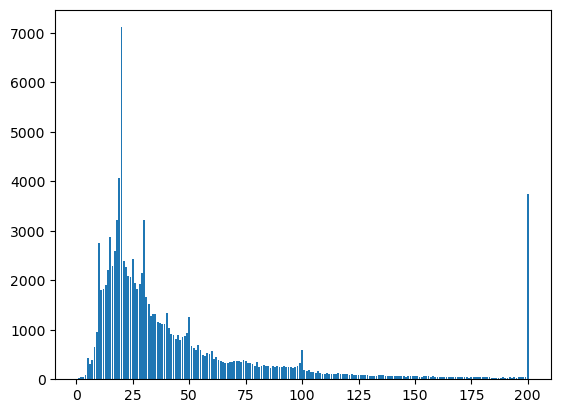

In [81]:
plt.bar(train_song_cnt['songs_cnt'], train_song_cnt['ply_cnt'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21175c22610>,
 'caps': [<matplotlib.lines.Line2D at 0x21175b82490>,
 'boxes': [<matplotlib.lines.Line2D at 0x21175b15f90>],
 'medians': [<matplotlib.lines.Line2D at 0x21175ad5290>],
 'fliers': [<matplotlib.lines.Line2D at 0x21175b05810>],
 'means': []}

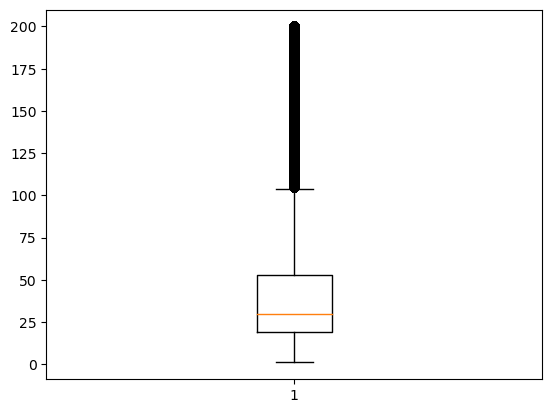

In [82]:
# boxplot를 통해 이상치 확인

plt.boxplot(train['songs_cnt'])
# 0~100개의 곡을 가진 플레이리스트는 정상 범주

In [83]:
train_ply_cut = train[(train['songs_cnt'] >= 5) & (train['songs_cnt'] <= 100) ]
train_ply_cut.info() # 109282 -98302 = 10980

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98302 entries, 0 to 109281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          98302 non-null  object
 1   id            98302 non-null  int64 
 2   plylst_title  98302 non-null  object
 3   songs         98302 non-null  object
 4   like_cnt      98302 non-null  int64 
 5   updt_date     98302 non-null  object
 6   songs_cnt     98302 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.0+ MB


In [84]:
train_ply_cut.to_json('./origin_data_modify/train_mod4.json')

### 7. 플레이리스트 별 좋아요 갯수 기준으로 자르기

In [87]:
train = pd.read_json('./origin_data_modify/train_mod4.json', typ='frame')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98302 entries, 0 to 109281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          98302 non-null  object
 1   id            98302 non-null  int64 
 2   plylst_title  98302 non-null  object
 3   songs         98302 non-null  object
 4   like_cnt      98302 non-null  int64 
 5   updt_date     98302 non-null  object
 6   songs_cnt     98302 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.0+ MB


In [90]:
train_like_cnt = train.groupby('like_cnt').count()['id'].reset_index().rename(columns={'id':'ply_like_cnt'})
train_like_cnt['cum_sum'] = train_like_cnt['ply_like_cnt'].cumsum()
train_like_cnt['rate'] = train_like_cnt['ply_like_cnt'].apply(lambda x: x/train_like_cnt['ply_like_cnt'].sum()*100)
train_like_cnt['cum_rate'] = train_like_cnt['rate'].cumsum()
train_like_cnt

,like_cnt,ply_like_cnt,cum_sum,rate,cum_rate
0,0,8571,8571,8.719049,8.719049
1,1,8778,17349,8.929625,17.648674
2,2,7567,24916,7.697707,25.346382
3,3,6717,31633,6.833025,32.179406
4,4,5845,37478,5.945962,38.125369
...,...,...,...,...,...
1949,18403,1,98298,0.001017,99.995931
1950,18810,1,98299,0.001017,99.996948
1951,21045,1,98300,0.001017,99.997965
1952,23965,1,98301,0.001017,99.998983


{'whiskers': [<matplotlib.lines.Line2D at 0x2116ed003d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2116ecf1090>,
 'boxes': [<matplotlib.lines.Line2D at 0x2116ed02a50>],
 'medians': [<matplotlib.lines.Line2D at 0x2116ece9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x2116ece8310>],
 'means': []}

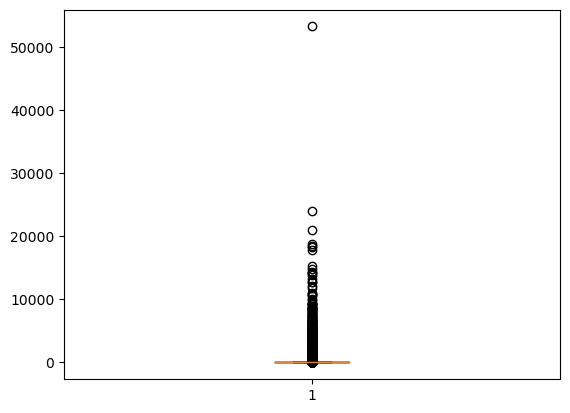

In [91]:
# boxplot 이상치 탐지 결과 이상함...

plt.boxplot(train['like_cnt'])

In [94]:
train[train['like_cnt'] <= 1]

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,36
1,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,39
3,[Pop],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000,34
5,"[빌로우, EDMFloor]",127714,10월의 최신 일렉트로닉 음악 소식,"[38118, 411444, 63494, 484785, 681150, 214502,...",0,2019-12-17 17:46:45.000,17
6,[드라이브],117452,11월 바이브,"[383775, 21458, 473901, 227505, 482512, 303312...",1,2018-11-25 01:38:59.000,40
...,...,...,...,...,...,...,...
109234,"[추억, 회상]",116190,02학번 새내기 시절에 듣던 노래,"[461413, 349751, 605602, 494890, 167641, 58686...",1,2018-08-21 16:58:25.000,100
109262,"[00년대, 팝송, 모음, 플레이리스트]",79166,00s Pop Song,"[564380, 705515, 502397, 505710, 679085, 33016...",1,2020-01-06 12:56:23.000,56
109266,"[Comfort, zone]",83504,00 s,"[390610, 436057, 332442, 651499, 170206, 82293...",0,2020-04-05 04:44:01.000,68
109272,[자정],62714,00 00 자정에 들어도 무난한 랩,"[31551, 654966, 365606, 242571, 567115, 360962...",0,2017-08-16 01:56:43.000,17


In [93]:
# train

train_cut = train[train['like_cnt'] > 1].reset_index(drop=True)
train_cut # 98302 - 17349 

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37
1,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[588425, 407630, 235568, 347651, 194467, 42313...",353,2016-12-26 12:33:33.000,28
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 591246, 18938, 610105, 676958...",29,2009-12-22 09:11:45.000,34
4,[일렉],27984,1월의 최신 EDM 소식,"[329736, 201677, 626680, 555898, 58608, 585855...",84,2015-01-29 16:22:19.000,14
...,...,...,...,...,...,...,...
80948,"[장르, 알엔비, 알엔비소울, 소울풀]",31642,00 R&B／Soul _ 장르,"[7730, 647775, 356025, 172750, 555157, 34548, ...",2,2020-04-23 00:13:14.000,17
80949,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,20
80950,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,59
80951,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,25


In [99]:
train_cut = train_cut.iloc[:, :6]
train_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80953 entries, 0 to 80952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          80953 non-null  object
 1   id            80953 non-null  int64 
 2   plylst_title  80953 non-null  object
 3   songs         80953 non-null  object
 4   like_cnt      80953 non-null  int64 
 5   updt_date     80953 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [100]:
train_cut.to_json('./origin_data_modify/train_mod5.json')